In [5]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
import matplotlib as mpl
import MDAnalysis.analysis.rms as rms
import sys

sys.path.append('../../../string/analysis/scripts')
from plot_parameters_for_paper import *

plotting_params()

In [6]:
indir = '../input_f/protein_only/'


out_open = np.array(['GLUT5_out', '#5912A3', 'Outward open'])
out_occ = np.array(['GLUT5_out_occ', '#0059E6', 'Outward occluded'])
occ = np.array(['GLUT5_occ', '#0096F5', 'Occluded'])
in_occ = np.array(['GLUT5_in_occ', '#00A396', 'Inward occluded'])
in_open = np.array(['GLUT5_in', '#007359', 'Inward open'])

all_sims = [out_open, out_occ,occ,in_occ,in_open]

In [32]:
def get_RMSD(ref, u, what_group):
    what_group_dict = {'all':'all',
                       'backbone':'backbone',
                      'skip_ICH5':'backbone and not resid 453-473',
                      'only_ICH5':'resid 453-473',
                      'skip_all_ICH': 'backbone and not resid 207-268+453-475',
                'TM':'backbone and resid 8-42+57-89+91-114+118-146+152-177+184-205+269-300+304-332+334-361+360-395+398-430+430-452',
        'skip_loops':'backbone and not resid 1-4+32-61+107-118+146-152+173-180+207-268+300-304+356-369+395-401+453-475'}
    
    selection=what_group_dict[what_group]

    R = rms.RMSD(reference = ref, 
                    atomgroup = u, 
                    select = selection, 
                    center = True
                   )
        
    R.run()
    
    return R.results.rmsd

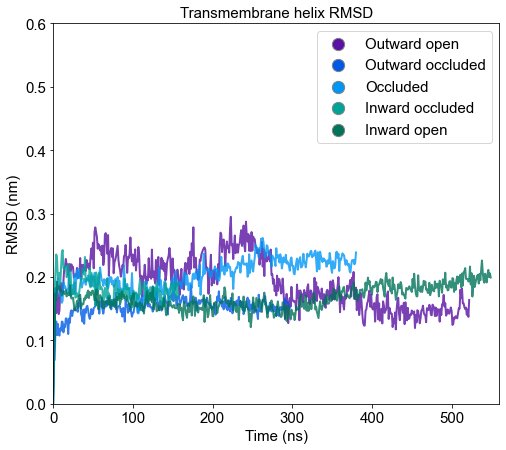

In [33]:
f,ax = plt.subplots(1,1, figsize=(8,7))

label_d = {'only_ICH5': 'ICH5 RMSD only', \
          'backbone': 'Backbone RMSD',\
          'skip_ICH5': 'Backbone RMSD excluding ICH5',\
          'TM':'Transmembrane helix RMSD'}

what_group = 'TM'

for sim in all_sims:
    ref = mda.Universe(f'{indir}/{sim[0]}.protein.start.gro')
    u = mda.Universe(f'{indir}/{sim[0]}.protein.start.gro', \
                    f'{indir}/{sim[0]}.protein.xtc')
    
    rmsd = get_RMSD(ref=ref, u=u, what_group = what_group)
    ax.plot(rmsd[:,2]/10, color = sim[1], alpha = 0.8, linewidth = 2)
    ax.scatter(-10,-10, color = sim[1], label = sim[2], s = 150, edgecolor = 'grey')

    
    
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')

plt.title(f"{label_d[what_group]}")
plt.xlim(0, 560)
plt.ylim(0, 0.6)
plt.legend()
plt.savefig(f'../images_figures/RMSD_all.{what_group}.svg', dpi = 1000)

In [25]:
a = get_RMSD(ref=ref,u=u,what_group='backbone')
b = get_RMSD(ref=ref,u=u,what_group='skip_ICH5')

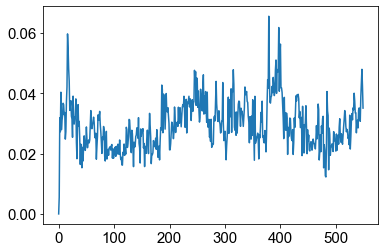

In [28]:
plt.plot((a[:,2]-b[:,2])/10)